In [2]:
import matplotlib
import matplotlib.pyplot as plt 
import random as rd
import pandas as pd
import networkx as nx
import numpy as np

from geopy import geocoders

gn = geocoders.GeoNames('pomme')

G = nx.Graph()

df = pd.read_csv('../dataset/Airlines.csv')

df.drop(['id'], axis=1, inplace=True)


# G.add_nodes_from(df['AirportFrom'].value_counts().index)

# From all airports add position


# nx.draw_networkx_nodes(G)
airports = pd.DataFrame()
# df['AirportFrom'].value_counts().index[:5]
for airport in df['AirportFrom'].value_counts().index:
    name, coord = gn.geocode(airport, exactly_one=False)[0]
    new_row = {'name' : airport, 'latitude' : coord[0], 'longitude' : coord[1]}
    airports = airports.append(new_row, ignore_index=True)

airports

/tmp/ipykernel_13583/3861541919.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  airports = airports.append(new_row, ignore_index=True)
/tmp/ipykernel_13583/3861541919.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  airports = airports.append(new_row, ignore_index=True)
/tmp/ipykernel_13583/3861541919.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  airports = airports.append(new_row, ignore_index=True)
/tmp/ipykernel_13583/3861541919.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  airports = airports.append(new_row, ignore_index=True)
/tmp/ipykernel_13583/3861541919.py:30: FutureWarning: The frame.append method is dep

name  latitude  longitude
0    ATL  10.96854  -74.78132
1    ORD -17.34425  128.91529
2    DFW  32.89595  -97.03720
3    DEN  52.95988    4.75933
4    LAX  10.44760   49.13010
..   ...       ...        ...
288  MMH  33.70567   68.28378
289  SJT  31.46377 -100.43704
290  GUM   5.97310  117.90610
291  ADK  51.87796 -176.64603
292  ABR  15.91370   47.22880

[293 rows x 3 columns]

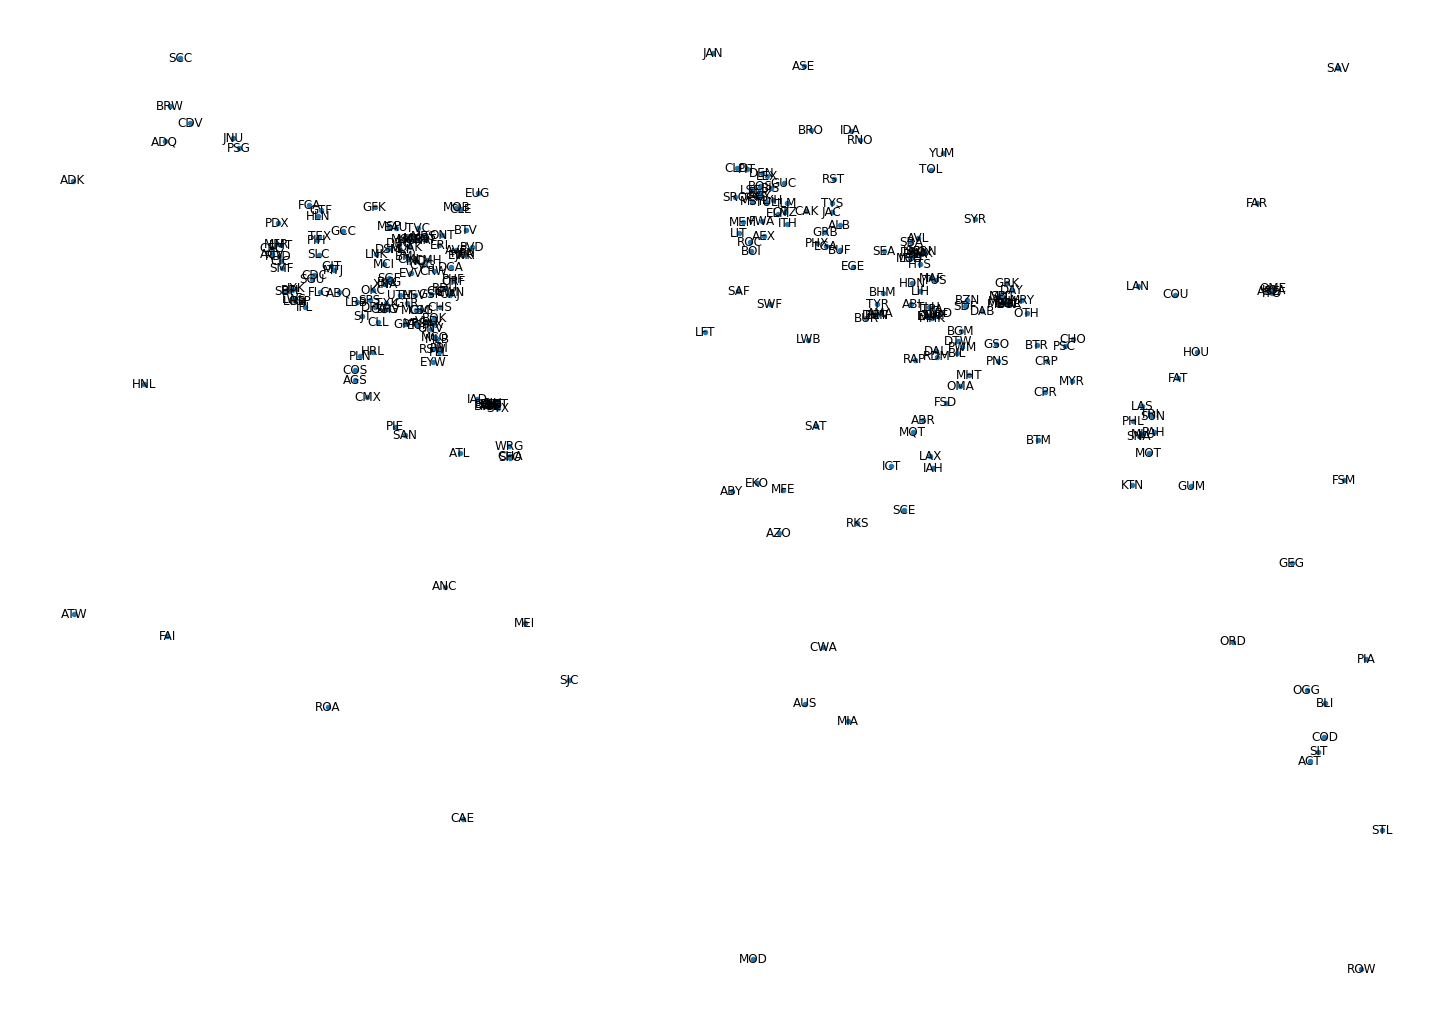

In [3]:
pos_dict = {}
dt_test = df.copy()

from math import sqrt

for row in airports.iterrows():
    G.add_node(row[1][0], pos=(row[1][2],row[1][1]))
    pos_dict[row[1][0]] = (row[1][2],row[1][1])
    mask1 = df['AirportFrom'].eq(row[1][0])
    mask2 = df['AirportTo'].eq(row[1][0])
    df.loc[mask1, 'Latitude_from'] = row[1][1]
    df.loc[mask1, 'Longitude_from'] = row[1][2]
    df.loc[mask2, 'Latitude_to'] = row[1][1]
    df.loc[mask2, 'Longitude_to'] = row[1][2]

plt.figure(figsize=(20,14)) 
nx.draw(G, pos=pos_dict, with_labels=True, font_size=12, node_size=20)

In [4]:
#  √ (x − x )2 + (y − y )2.
df['Distance'] = ((df['Longitude_from'] - df['Longitude_to'])**2 + (df['Latitude_from'] - df['Latitude_to'])**2).apply(lambda x: sqrt(x))
df

Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  Delay  \
0           CO     269         SFO       IAH          3    15     205      1   
1           US    1558         PHX       CLT          3    15     222      1   
2           AA    2400         LAX       DFW          3    20     165      1   
3           AA    2466         SFO       DFW          3    20     195      1   
4           AS     108         ANC       SEA          3    30     202      0   
...        ...     ...         ...       ...        ...   ...     ...    ...   
539378      CO     178         OGG       SNA          5  1439     326      0   
539379      FL     398         SEA       ATL          5  1439     305      0   
539380      FL     609         SFO       MKE          5  1439     255      0   
539381      UA      78         HNL       SFO          5  1439     313      1   
539382      US    1442         LAX       PHL          5  1439     301      1   

        Latitude_from  Longitude_from  Latitude_to  Longitude_to    Distance  
0            10.27969       -61.46835      8.75000      49.83333  111.312191  
1            42.44111        19.26361     35.22709     -80.84313  100.366336  
2            10.44760        49.13010     32.89595     -97.03720  147.881060  
3            10.27969       -61.46835     32.89595     -97.03720   42.150188  
4            -9.08528       -78.57833     41.25206      36.96073  126.028259  
...               ...             ...          ...           ...         ...  
539378      -24.70000       148.19194     13.47284     104.06114   58.349749  
539379       41.25206        36.96073     10.96854     -74.78132  115.772956  
539380       10.27969       -61.46835     43.03890     -87.90647   42.096794  
539381       21.30694      -157.85833     10.27969     -61.46835   97.018702  
539382       10.44760        49.13010     15.80672     102.59111   53.728947  

[539383 rows x 13 columns]

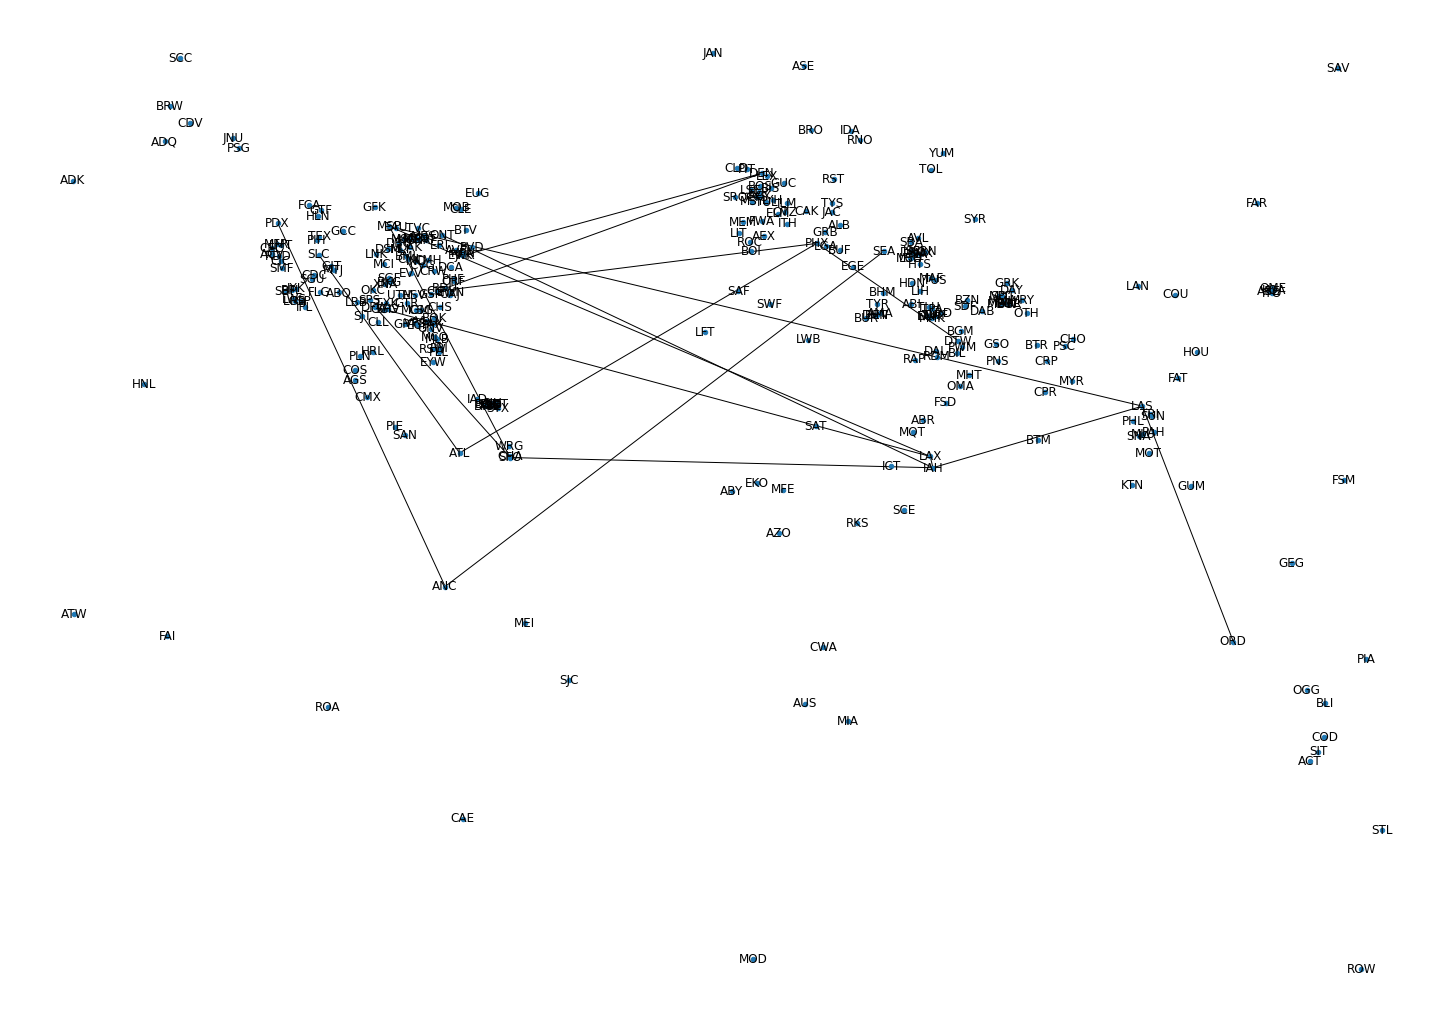

In [5]:
short_df = df.iloc[0:20]
graphs = G.copy()
for row in short_df.iterrows():
    graphs.add_edge(row[1][2], row[1][3], color="black")
    # pos_dict[row[1][0]] = (row[1][1],row[1][2])

plt.figure(figsize=(20,14)) 
nx.draw(graphs, pos=pos_dict, with_labels=True, font_size=12, node_size=20)


In [6]:
df.groupby(['Flight', 'Delay']).size()

Flight  Delay
1       0        139
        1        150
2       0        130
        1        111
3       0        146
                ... 
7811    1         25
7812    0         23
        1         39
7813    1          6
7814    1          1
Length: 13115, dtype: int64

<AxesSubplot:xlabel='DayOfWeek', ylabel='Count'>

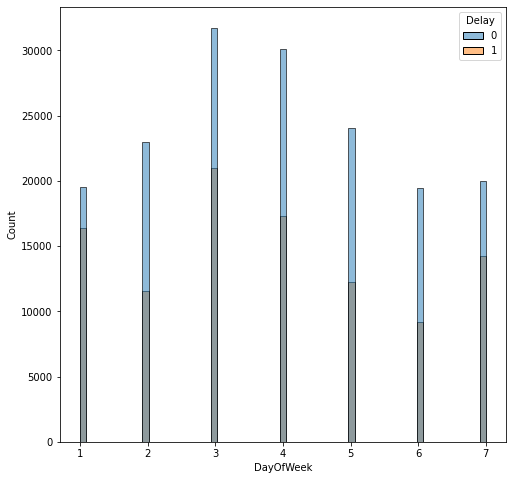

In [143]:
import seaborn as sns

df_display = df.iloc[0:df.shape[0] // 2]

f, ax = plt.subplots(figsize=(8, 8))
sns.histplot(df_display, x="DayOfWeek",hue="Delay")

# 5 et 6 have more delayed flight

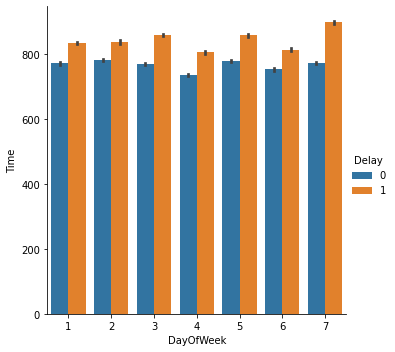

In [8]:
sns.catplot(
    data=df_display, kind="bar",
    x="DayOfWeek", y='Time', hue="Delay")

# More time seems to have more delayed

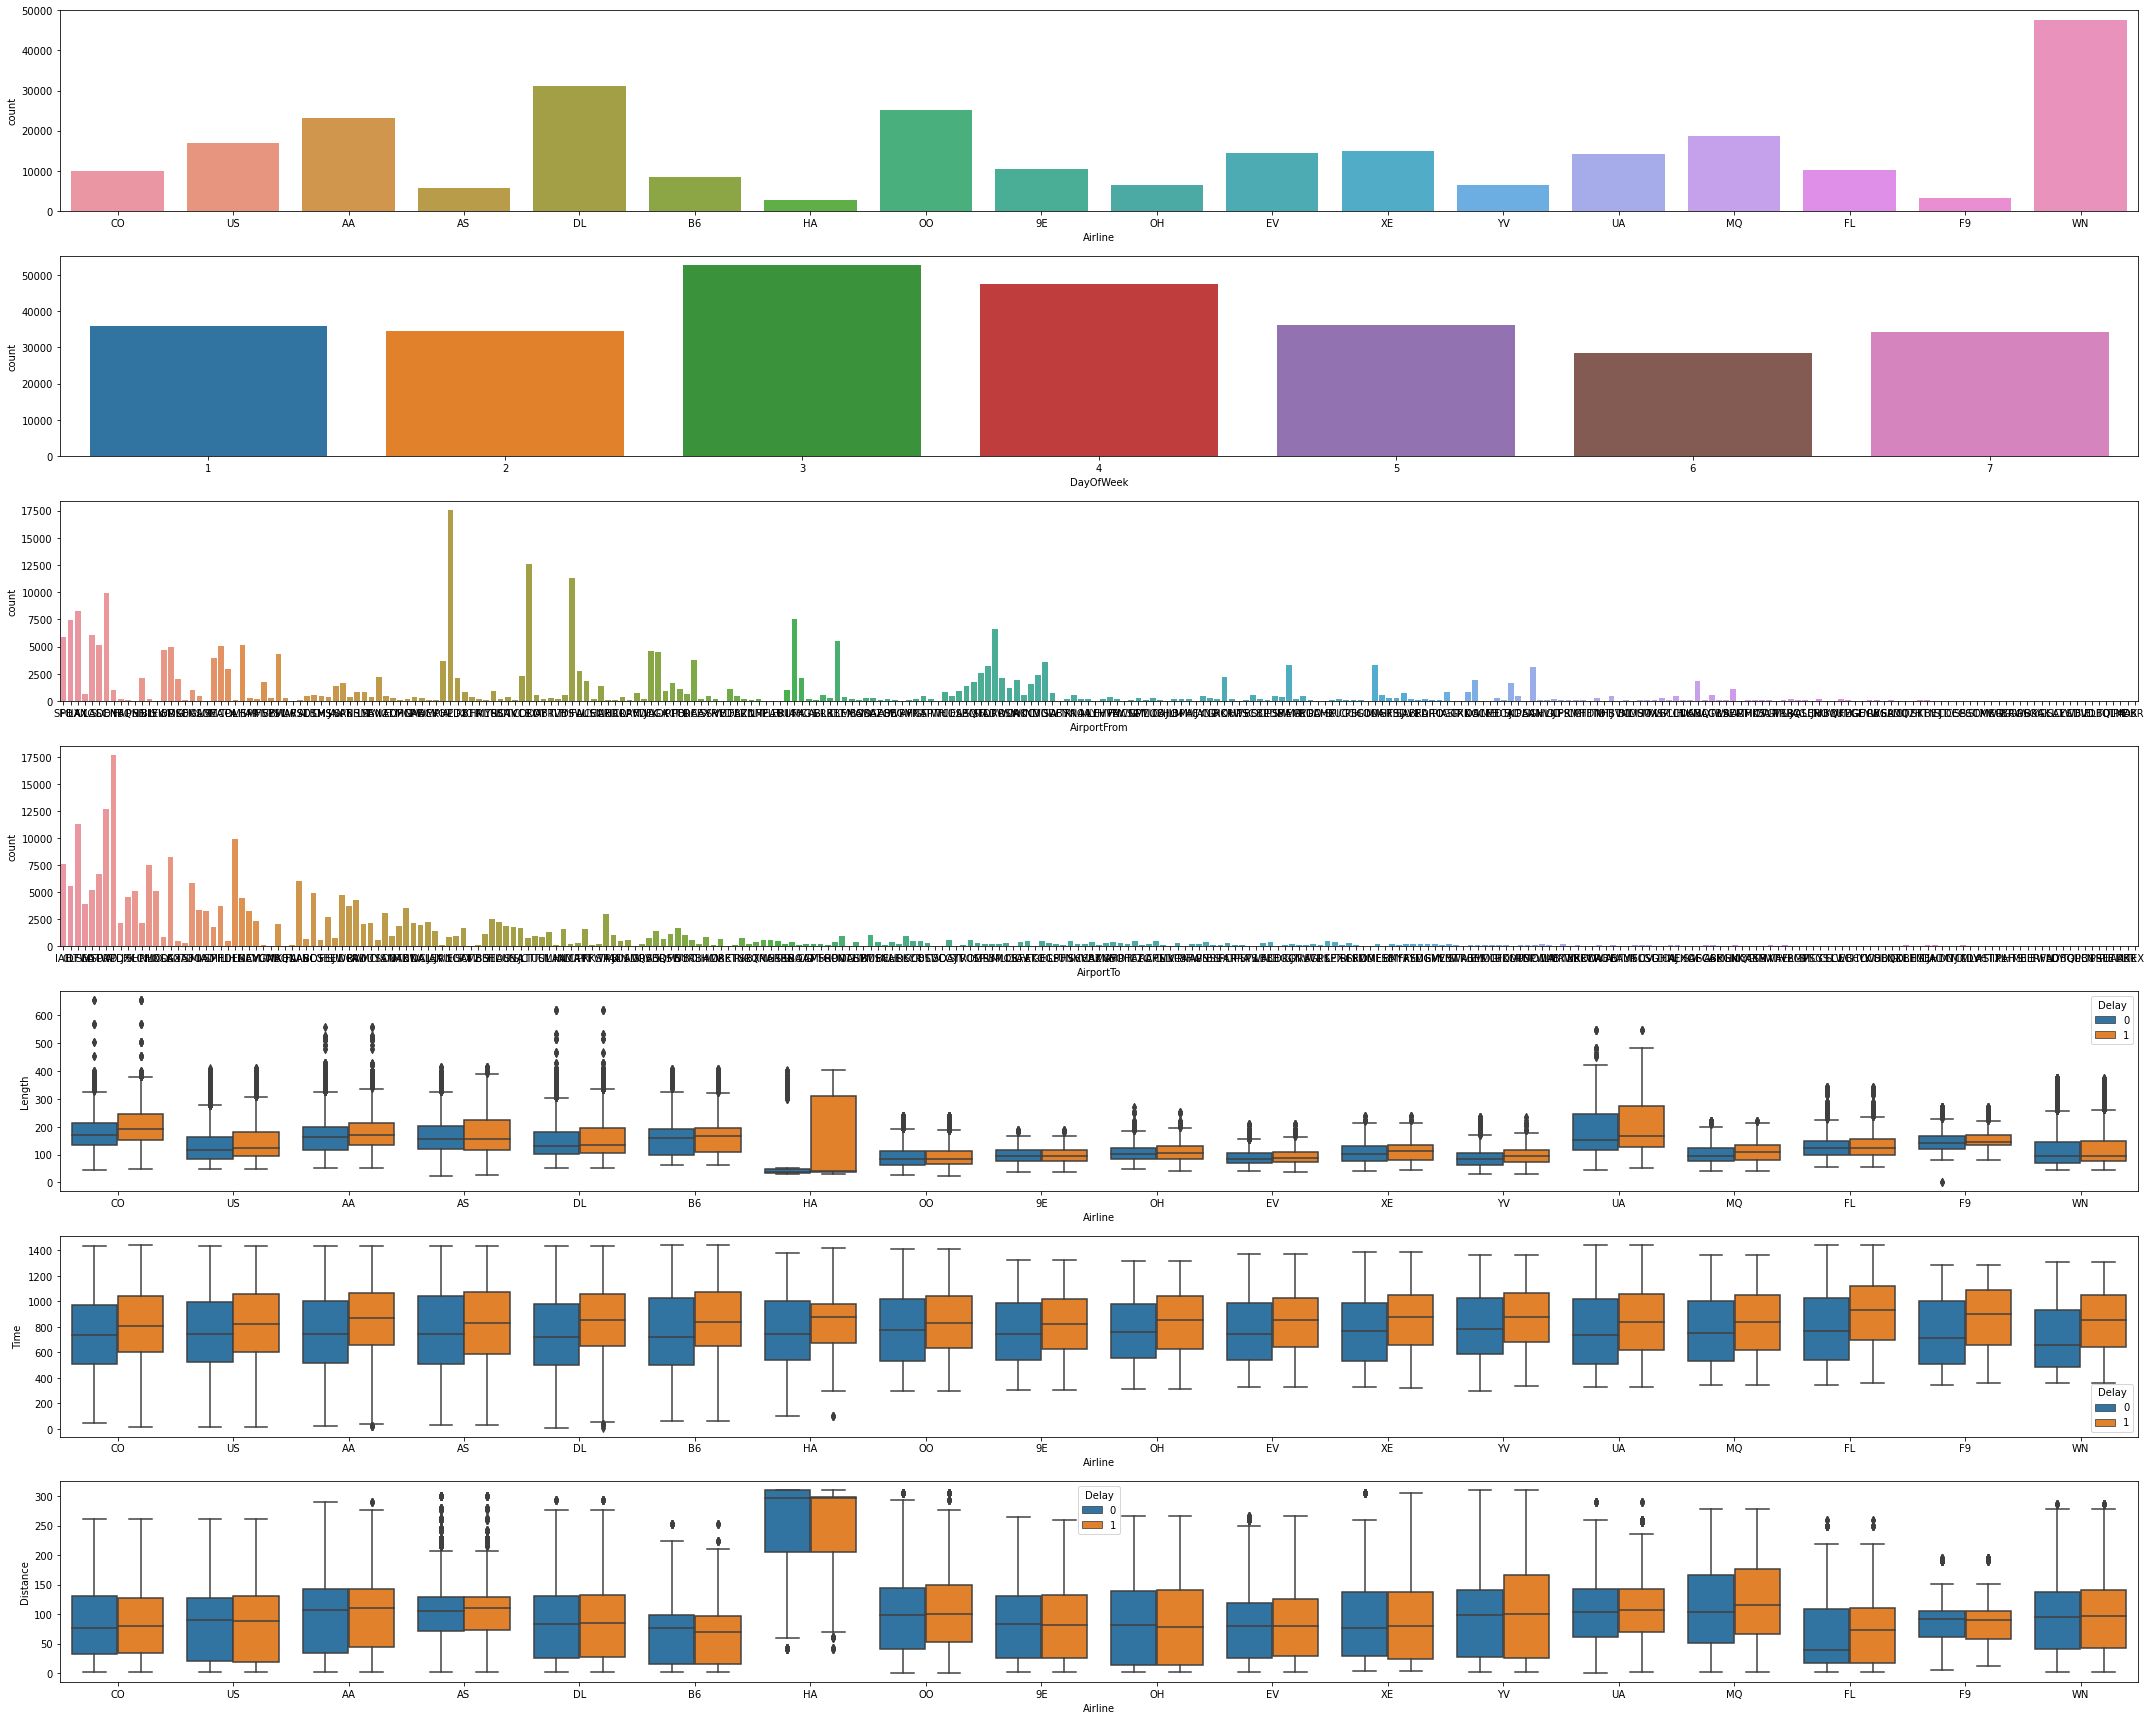

In [144]:
f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7, 1, figsize=(30, 24))

sns.countplot(x='Airline', data=df_display, ax=ax1) 
sns.countplot(x='DayOfWeek', data=df_display, ax=ax2) 
sns.countplot(x='AirportFrom', data=df_display, ax=ax3) 
sns.countplot(x='AirportTo', data=df_display, ax=ax4) 
sns.boxplot(x="Airline", y="Length",hue="Delay"
             ,data=df_display, ax=ax5)

sns.boxplot(x="Airline", y="Time",hue="Delay"
             ,data=df_display, ax=ax6)
sns.boxplot(x="Airline", y="Distance",hue="Delay"
             ,data=df_display, ax=ax7)
f.tight_layout()

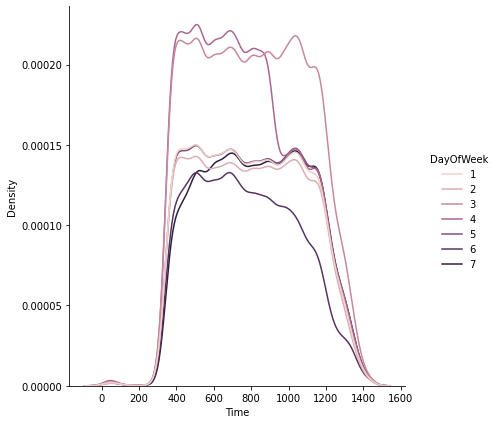

In [10]:
# sns.heatmap(df.corr())
sns.displot(
    data=df_display,
    x="Time", hue="DayOfWeek", 
    kind="kde", height=6)

# Maybe more less time during the weekend

/home/titi/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/titi/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/titi/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

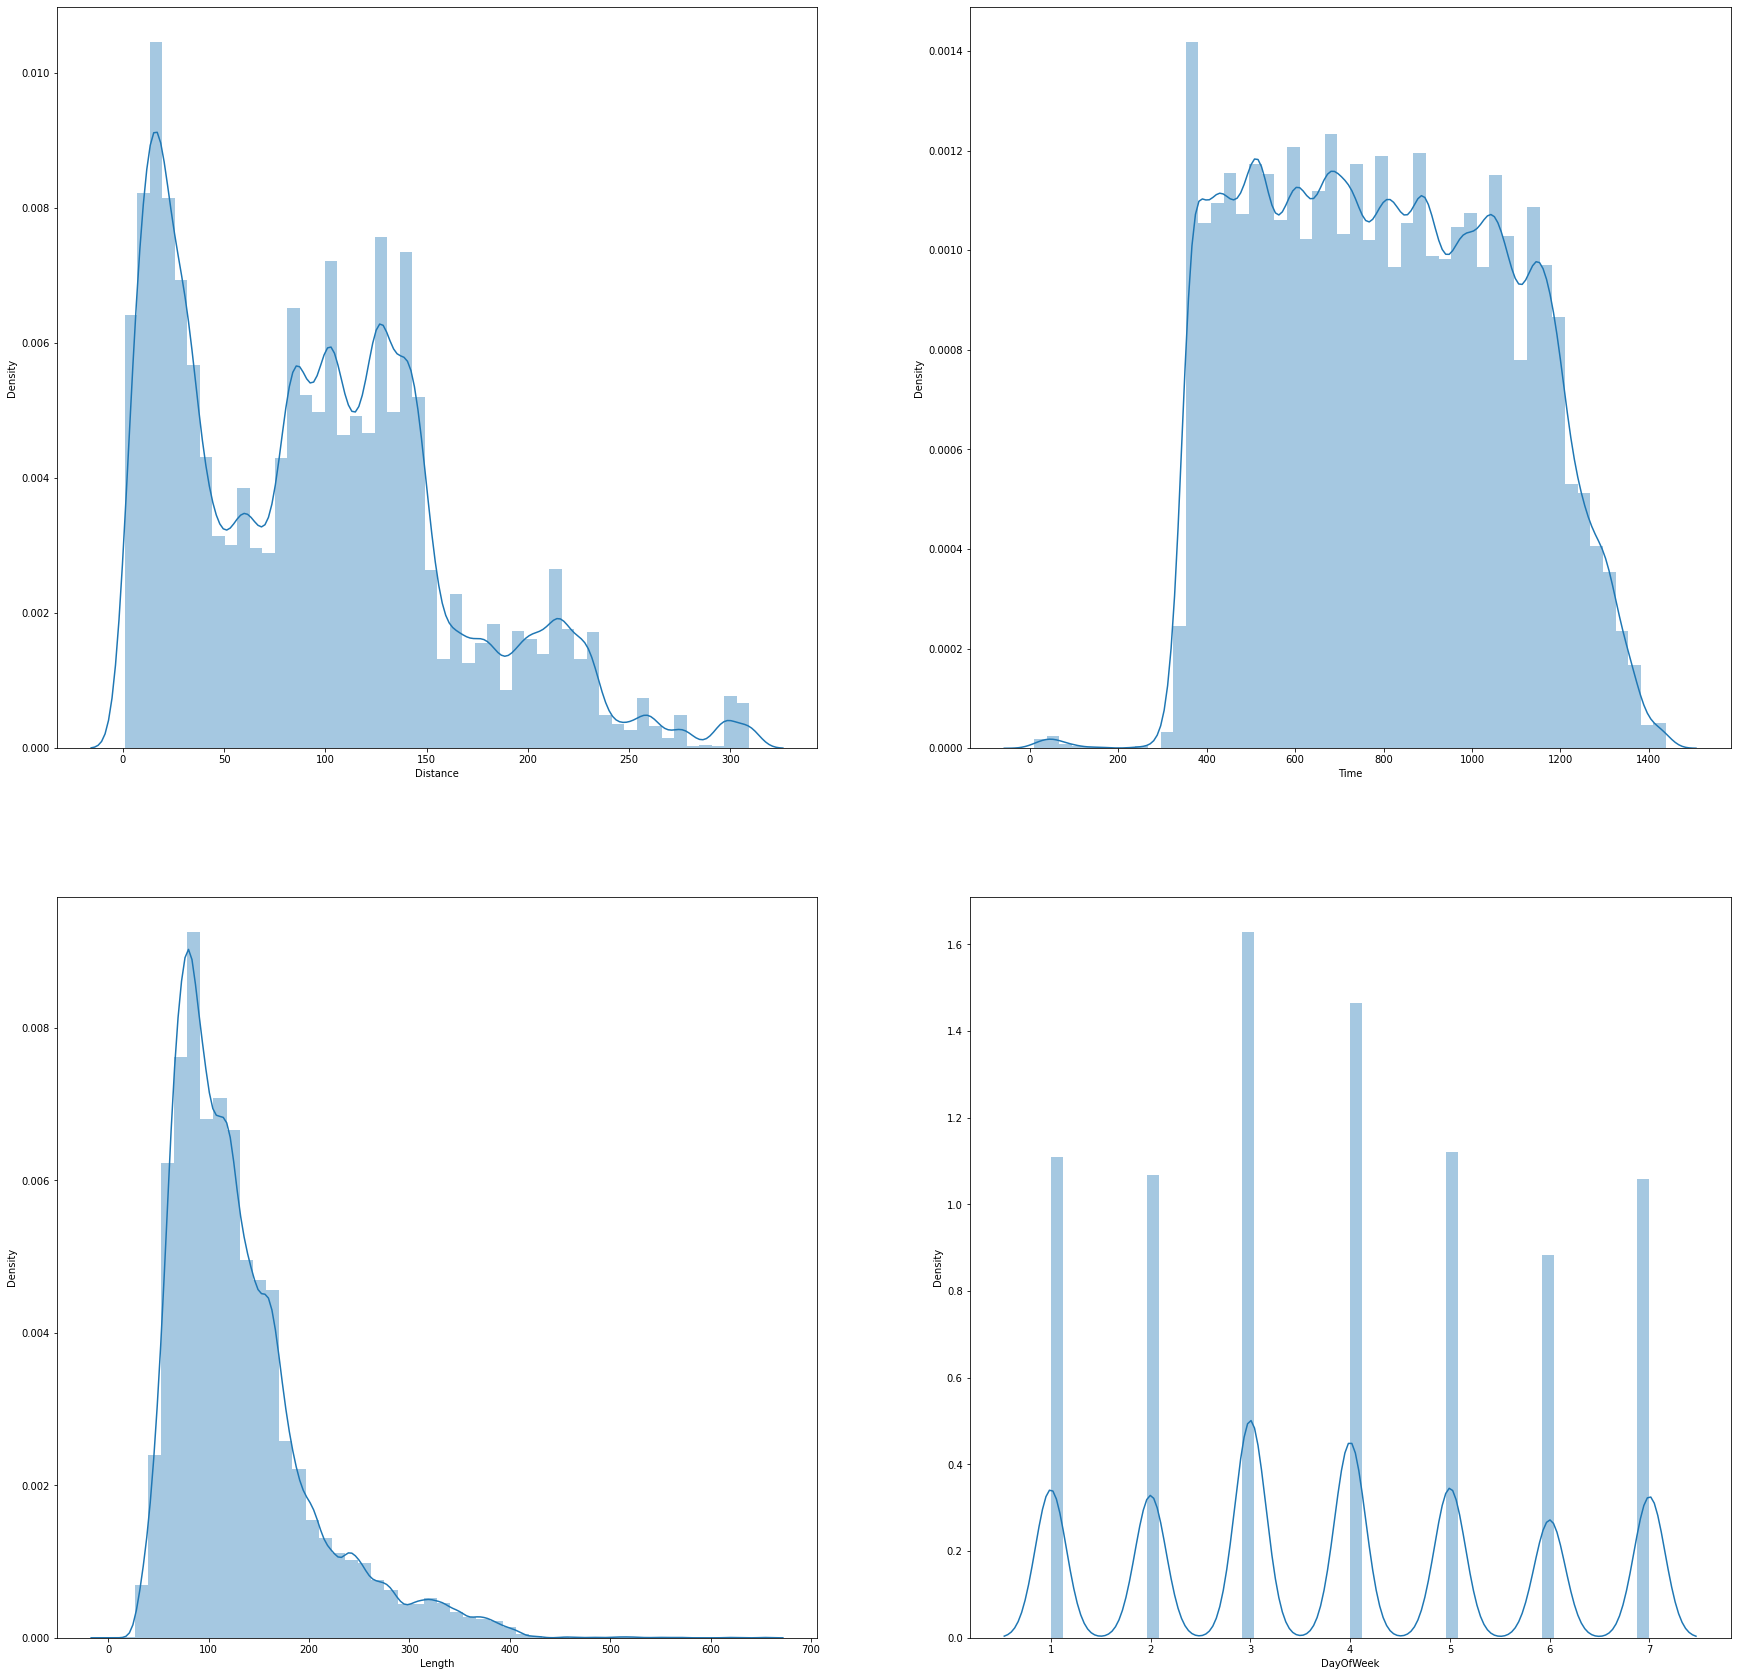

In [11]:
pd.options.display.max_rows = 1000

# df_display['AirportTo'].value_counts()
def distributions(row, colum, data): 
    fig, ax = plt.subplots(nrows=row, ncols=colum, figsize=(30,30))
    col = data.columns
    index = 0
    for i in range(row):
        for j in range(colum):
            sns.distplot(data[col[index]], ax=ax[i][j])
            index += 1

df_distribution = pd.DataFrame().assign(Distance=df_display['Distance'], Time=df_display['Time'], Length=df_display['Length'], DayOfWeek=df_display['DayOfWeek'] )
df_distribution
distributions(2,2,df_distribution)

In [12]:
df_category = pd.DataFrame().assign(Distance=df_display['AirportFrom'], Time=df_display['Airline'], Length=df_display['AirportTo'])


def category_count(dataset):
    for col in dataset.select_dtypes('object'):
        print(f'{col :-<50}{dataset[col].unique()}')

def category_pie(dataset):
    for col in dataset.select_dtypes('object'):
        plt.figure()
        dataset[col].value_counts().plot.pie()

def category_heatmap_y(dataset):
    for col in dataset.select_dtypes('object'):
        plt.figure(figsize=(20,20))
        sns.heatmap(pd.crosstab(df_display['Delay'], df_display[col]), annot=True, fmt='d')

# category_count(df_display)
# category_heatmap_y(df_display)

/home/titi/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/titi/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/titi/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

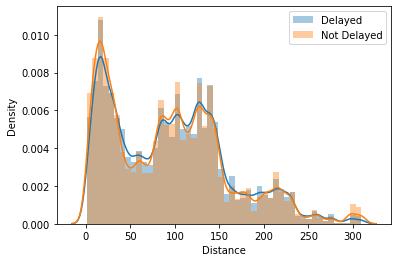

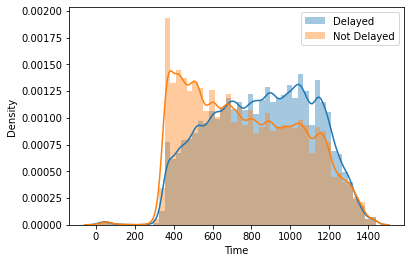

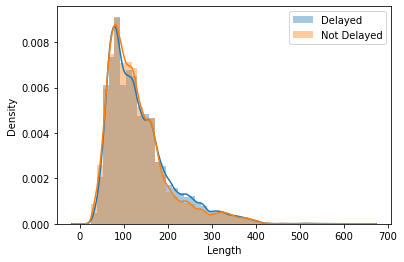

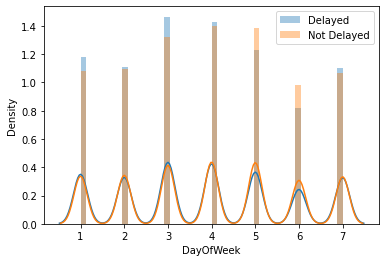

In [13]:
delayed = df[df['Delay'] == 1]
not_delayed = df[df['Delay'] == 0]

for col in df_distribution:
    plt.figure()
    sns.distplot(delayed[col], label='Delayed')
    sns.distplot(not_delayed[col], label='Not Delayed')
    plt.legend()

In [14]:
# sns.jointplot(x=df_display['Distance'], y=df_display['Time'], kind="hex", height=8)
# sns.jointplot(x=df_display['Length'], y=df_display['Time'], kind="hex", height=8)

In [45]:
df_test = df.copy()
df_test

Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  Delay  \
0           CO     269         SFO       IAH          3    15     205      1   
1           US    1558         PHX       CLT          3    15     222      1   
2           AA    2400         LAX       DFW          3    20     165      1   
3           AA    2466         SFO       DFW          3    20     195      1   
4           AS     108         ANC       SEA          3    30     202      0   
...        ...     ...         ...       ...        ...   ...     ...    ...   
539378      CO     178         OGG       SNA          5  1439     326      0   
539379      FL     398         SEA       ATL          5  1439     305      0   
539380      FL     609         SFO       MKE          5  1439     255      0   
539381      UA      78         HNL       SFO          5  1439     313      1   
539382      US    1442         LAX       PHL          5  1439     301      1   

        Latitude_from  Longitude_from  Latitude_to  Longitude_to    Distance  
0            10.27969       -61.46835      8.75000      49.83333  111.312191  
1            42.44111        19.26361     35.22709     -80.84313  100.366336  
2            10.44760        49.13010     32.89595     -97.03720  147.881060  
3            10.27969       -61.46835     32.89595     -97.03720   42.150188  
4            -9.08528       -78.57833     41.25206      36.96073  126.028259  
...               ...             ...          ...           ...         ...  
539378      -24.70000       148.19194     13.47284     104.06114   58.349749  
539379       41.25206        36.96073     10.96854     -74.78132  115.772956  
539380       10.27969       -61.46835     43.03890     -87.90647   42.096794  
539381       21.30694      -157.85833     10.27969     -61.46835   97.018702  
539382       10.44760        49.13010     15.80672     102.59111   53.728947  

[539383 rows x 13 columns]

In [131]:
airline = dict(zip(df_test['Airline'].value_counts().index, [0] * len(df_test['Airline'].value_counts().values)))

for row in df.iterrows():
    if row[1][7] == 1: 
        airline[row[1][0]] += 1
airline

{'WN': 65657,
 'DL': 27452,
 'OO': 22760,
 'AA': 17736,
 'MQ': 12742,
 'US': 11591,
 'XE': 11795,
 'EV': 11255,
 'UA': 8946,
 'CO': 11957,
 'FL': 6275,
 '9E': 8226,
 'B6': 8459,
 'YV': 3334,
 'OH': 3502,
 'AS': 3892,
 'F9': 2899,
 'HA': 1786}

In [140]:
not_delayed = list(map(abs, [x[1] for x in airline.items()] - df_test['Airline'].value_counts().values))
final = {}
for x, y in zip(airline.items(), not_delayed):
    final[x[0]] = {'Delayed' : x[1], 'Not delayed' : y }
final

{'WN': {'Delayed': 65657, 'Not delayed': 28440},
 'DL': {'Delayed': 27452, 'Not delayed': 33488},
 'OO': {'Delayed': 22760, 'Not delayed': 27494},
 'AA': {'Delayed': 17736, 'Not delayed': 27920},
 'MQ': {'Delayed': 12742, 'Not delayed': 23863},
 'US': {'Delayed': 11591, 'Not delayed': 22909},
 'XE': {'Delayed': 11795, 'Not delayed': 19331},
 'EV': {'Delayed': 11255, 'Not delayed': 16728},
 'UA': {'Delayed': 8946, 'Not delayed': 18673},
 'CO': {'Delayed': 11957, 'Not delayed': 9161},
 'FL': {'Delayed': 6275, 'Not delayed': 14552},
 '9E': {'Delayed': 8226, 'Not delayed': 12460},
 'B6': {'Delayed': 8459, 'Not delayed': 9653},
 'YV': {'Delayed': 3334, 'Not delayed': 10391},
 'OH': {'Delayed': 3502, 'Not delayed': 9128},
 'AS': {'Delayed': 3892, 'Not delayed': 7579},
 'F9': {'Delayed': 2899, 'Not delayed': 3557},
 'HA': {'Delayed': 1786, 'Not delayed': 3792}}

In [182]:
df.groupby(['Airline']).agg(['mean', 'std', 'max','min'])
# df.groupby(['Airline', 'Delay']).count().sort_values('Delay', ascending=False)

/tmp/ipykernel_13583/414148958.py:1: FutureWarning: ['AirportFrom', 'AirportTo'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby(['Airline']).agg(['mean', 'std', 'max','min'])


Flight                          DayOfWeek                    \
                mean          std   max   min      mean       std max min   
Airline                                                                     
9E       4001.839312   216.264726  4399  3650  3.907667  1.917133   7   1   
AA       1250.938365   658.032590  2606     1  3.957530  1.921848   7   1   
AS        382.717026   270.524838   977     1  3.955714  1.915920   7   1   
B6        598.541078   440.478268  1909     1  4.003202  1.922636   7   1   
CO        850.925893   590.857124  1893     1  3.927597  1.909819   7   1   
DL       1828.516672   724.986525  2999     1  3.933443  1.914482   7   1   
EV       5575.328414   723.770007  7399  4939  3.924097  1.916516   7   1   
F9        484.130576   226.696311   868    38  3.913569  1.906155   7   1   
FL        648.895904   427.376952  1967     6  3.993902  1.916236   7   1   
HA        229.838293   154.078269   596     1  4.027967  1.921241   7   1   
MQ       3663.847835   593.920910  4698  2700  3.927114  1.918168   7   1   
OH       6487.924941   146.574480  6776  6255  3.857641  1.910211   7   1   
OO       6099.099634  1010.790979  7814  3044  3.932781  1.920354   7   1   
UA        467.324849   281.918013   999     1  3.946884  1.916301   7   1   
US       1071.300783   627.948804  2191     1  3.923826  1.895039   7   1   
WN       1407.982773  1026.688249  3957     1  3.893727  1.911095   7   1   
XE       3067.895007  1211.633008  5999  2000  3.896292  1.916014   7   1   
YV       3695.040364  2110.701209  7309  1002  3.983097  1.910297   7   1   

               Time              ... Latitude_to           Longitude_to  \
               mean         std  ...         max       min         mean   
Airline                          ...                                      
9E       792.173306  269.671336  ...    71.08333 -45.66667    -7.948175   
AA       800.802896  279.623462  ...    57.91550 -45.66667   -16.840416   
AS       796.656351  297.168257  ...    70.25528 -45.66667   -10.491685   
B6       825.502264  305.779829  ...    53.53333 -26.66667   -46.348867   
CO       790.355479  288.210477  ...    53.53333 -29.30405    -6.063550   
DL       799.636167  286.304760  ...    71.08333 -45.66667   -35.229650   
EV       799.839653  267.501563  ...    71.08333 -45.66667   -36.721417   
F9       807.088600  280.773655  ...    52.95988 -45.66667    -7.573009   
FL       833.154463  286.434224  ...    53.53333 -45.66667   -46.372893   
HA       795.226067  277.438400  ...    45.52345 -24.70000   -19.573528   
MQ       791.475236  270.984801  ...    71.08333 -66.51667    -3.139786   
OH       793.020982  263.292537  ...    71.08333 -45.66667   -26.482298   
OO       811.207008  281.312329  ...    69.01204 -65.00000   -18.153586   
UA       797.744886  292.949929  ...    57.91550 -45.66667     9.055543   
US       805.075884  290.989185  ...    57.91550 -45.66667   -12.632037   
WN       802.343592  260.773857  ...    71.08333 -45.66667     5.899045   
XE       792.137184  264.796428  ...    71.08333 -45.66667    -1.782171   
YV       832.256831  276.072112  ...    68.81667 -45.66667    -9.738401   

                                             Distance                         \
                std        max        min        mean        std         max   
Airline                                                                        
9E        68.460120  168.00000 -176.17453   79.907588  56.962002  266.370986   
AA        83.898518  168.00000 -157.85833  104.586358  66.594505  289.366590   
AS        86.548478  168.00000 -176.64603  111.606185  62.155309  300.130099   
B6        53.701949  128.91529 -122.67621   64.621703  52.242876  252.335094   
CO        67.553580  148.19194 -157.85833   82.656028  55.853041  276.190419   
DL        67.429586  168.00000 -157.85833   83.678465  62.011354  292.931227   
EV        63.351013  168.00000 -176.17453   80.655749  55.935292  266.370986   
F9        61.378012 

In [187]:
set([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,15])

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}